*** Q ***

1

in A_zwickau there is some strange text that looks like: 

Beatus venter Ante portam orientalem civitatis ad iactum 2 sagittarum in arena ostenditur locus predicationis Ihesu Christi, ubi extulit vocem mulier de turba, d[icens]

need to understand what is meanin of \[ and how proceed this kind of words

2 

There is usage „Beatus venter“ VS “Beatus venter qui te portavit et ubera que succisti,” should be escaped or considered as punctuation usage?


In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
%pip install cltk -q

Note: you may need to restart the kernel to use updated packages.


In [11]:
# some manual processing that i did on text:
# convert docx to txt format
# remove footer from txt file
# remove header in english from txt file

import os
import re
import imp
import json
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim import corpora
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [22]:
a_zwickau_text = thesisDataReader.read_zwickau()
b_london_text = thesisDataReader.read_london()

# TODO: we are not using stop words for now
# stop_words = json.load(open(stop_words_file_path))

In [18]:
zwickau_corpus = thesisDataReader.get_zwickau_corpus()
london_corpus = thesisDataReader.get_london_corpus()
breslau_corpus = thesisDataReader.get_brealsu_corpus()

In [20]:
# breslau_corpus

In [23]:
a_zwickau_bag_of_words = thesisTextPreprocessing.create_bag_of_words(zwickau_corpus)
b_london_bag_of_words = thesisTextPreprocessing.create_bag_of_words(london_corpus)
breslau_bag_of_words = thesisTextPreprocessing.create_bag_of_words(breslau_corpus)

,total_characters,total_words,unique_words,paragraphs,unique_lemmatized_word
A_Zwickau_RB_I_XII_5,173754.0,27335.0,6322.0,322.0,4239.0
B_London_BL_Add_18929,193561.0,30503.0,6703.0,318.0,4358.0
Breslau,63349.0,9968.0,3037.0,71.0,2126.0


<AxesSubplot:>

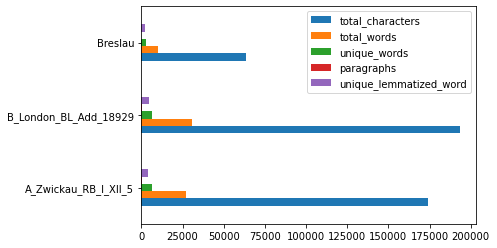

In [26]:
import features.lexical as thesisLexicalFeatures
imp.reload(thesisLexicalFeatures)

lexical_features_df = pd.concat([
    thesisLexicalFeatures.create_lexical_features_df(zwickau_corpus, "A_Zwickau_RB_I_XII_5"), 
    thesisLexicalFeatures.create_lexical_features_df(london_corpus, "B_London_BL_Add_18929"),
    thesisLexicalFeatures.create_lexical_features_df(breslau_corpus, "Breslau")
])

display(lexical_features_df)
lexical_features_df.plot(kind="barh")

In [27]:
# here is neat graph for count: https://www.absentdata.com/python-graphs/python-word-frequency/
def create_words_frequency(corpus):    
    word_counter =  Counter(' '.join(corpus).split())
    return sorted(word_counter.items(), key=lambda item: item[1], reverse=True)

In [28]:
create_words_frequency(zwickau_corpus)[:10]

[('et', 1521),
 ('in', 1038),
 ('est', 600),
 ('de', 459),
 ('ad', 426),
 ('que', 263),
 ('quod', 247),
 ('per', 224),
 ('sunt', 215),
 ('contra', 198)]

In [29]:
create_words_frequency(london_corpus)[:10]

[('et', 1685),
 ('in', 1149),
 ('est', 668),
 ('de', 531),
 ('ad', 441),
 ('quod', 273),
 ('que', 260),
 ('per', 258),
 ('contra', 247),
 ('sunt', 228)]

In [30]:
create_words_frequency(breslau_corpus)[:10]

[('et', 493),
 ('in', 380),
 ('ad', 253),
 ('est', 206),
 ('de', 185),
 ('contra', 111),
 ('que', 92),
 ('ubi', 88),
 ('quod', 80),
 ('leucas', 78)]

In [31]:
# it is better to split this to different 2 function cause the result is not real bag of words but word counter
def create_bag_of_words_by_paragraph(corpus):
    tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
    bag_of_words_by_paragpaph = {}
    for i, sentence in enumerate(corpus):
        tokens = tokenizer.tokenize(sentence)
        bag_of_words_by_paragpaph[i] = dict((tok, 1) for tok in tokens)
    return bag_of_words_by_paragpaph


In [32]:
zwickau_bag_of_words = create_bag_of_words_by_paragraph(zwickau_corpus)
london_bag_of_words = create_bag_of_words_by_paragraph(london_corpus)
breslau_bag_of_words = create_bag_of_words_by_paragraph(breslau_corpus)

zwickau_bag_of_words_df = pd.DataFrame.from_records(zwickau_bag_of_words).fillna(0).astype(int).T
london_bag_of_words_df = pd.DataFrame.from_records(london_bag_of_words).fillna(0).astype(int).T
breslau_bag_of_words_df = pd.DataFrame.from_records(breslau_bag_of_words).fillna(0).astype(int).T
# a_zwickau_bag_of_words

In [34]:
zwickau_bag_of_words_df

,incipit,descripcio,terre,sancte,cum,sicut,dicit,ieronimus,quosdam,inueniamus,...,ymaginacio,utinam,tenebris,occurrat,terrere,teterrime,larue,libri,statu,dispositione
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0


In [35]:
london_bag_of_words_df

,liber,de,terra,sancta,cum,in,ueteribus,hystoriis,legamus,sicut,...,sumpsit,ramatham,doram,excedere,porrigitur,belenas,gyblin,egippi,dietarum,amen
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
314,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,1,0,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [36]:
breslau_bag_of_words_df

,dilectissimo,in,cristo,ihesu,patri,burghardo,lectori,fratrum,ordinis,predicatorum,...,ff,[initu]m,anno,1407,crasino,francisci,[confratris],triarum,corrige,lector
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def calculate_bag_of_words_overlap(df):
    paragrapns_amount = len(df.index) - 1
    overlaps = np.empty([paragrapns_amount + 1, paragrapns_amount + 1])
    
    for passNo in range(paragrapns_amount, -1, -1):
        overlaps[passNo][passNo] = 0
        for idx in range(passNo):
            dot_product = df.iloc[passNo].dot(df.iloc[idx])
            overlaps[passNo][idx] = overlaps[idx][passNo] = dot_product
    
    return overlaps

In [38]:
zwickau_bag_of_words_overlap = calculate_bag_of_words_overlap(zwickau_bag_of_words_df)
london_bag_of_words_overlap = calculate_bag_of_words_overlap(london_bag_of_words_df)

zwickau_bag_of_words_overlap_df = pd.DataFrame.from_records(zwickau_bag_of_words_overlap).fillna(0).astype(int).T
london_bag_of_words_overlap_df = pd.DataFrame.from_records(london_bag_of_words_overlap).fillna(0).astype(int).T

london_bag_of_words_overlap_df

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,0,1,0,0,1,2,0,1,1,1,...,2,1,2,1,1,1,2,2,1,2
1,1,0,6,6,6,12,12,8,9,7,...,14,9,11,7,9,17,7,6,3,7
2,0,6,0,6,4,6,8,6,5,7,...,6,3,8,8,5,9,7,5,3,7
3,0,6,6,0,6,10,9,11,7,8,...,11,6,11,8,7,19,7,6,5,6
4,1,6,4,6,0,11,9,8,7,13,...,8,4,10,7,6,9,8,6,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1,17,9,19,9,19,20,16,15,18,...,31,23,30,28,25,0,20,18,9,15
314,2,7,7,7,8,14,18,15,14,17,...,17,8,16,12,10,20,0,35,19,27
315,2,6,5,6,6,11,14,12,10,16,...,17,8,15,9,7,18,35,0,15,17
316,1,3,3,5,4,5,9,9,4,10,...,8,5,10,5,5,9,19,15,0,13


In [284]:
a_zwickau_bag_of_words_overlap_describe = a_zwickau_bag_of_words_overlap_df.describe()
b_london_bag_of_words_overlap_describe = b_london_bag_of_words_overlap_df.describe()

In [285]:
b_london_bag_of_words_overlap_describe

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,...,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.993711,6.823899,5.116352,6.135220,5.320755,10.515723,9.433962,9.512579,7.635220,11.056604,...,13.176101,7.915094,13.830189,9.877358,8.207547,16.125786,12.264151,10.591195,6.103774,9.619497
std,0.719243,3.509401,2.134806,3.260114,2.548757,4.757004,4.628165,4.617703,3.800085,5.388087,...,6.647534,3.214080,6.929303,4.379554,3.946129,8.138581,5.590046,4.882485,2.877946,4.563937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.250000,4.000000,4.000000,7.000000,6.000000,6.000000,5.000000,7.000000,...,8.000000,6.000000,9.000000,7.000000,5.000000,10.000000,8.000000,7.000000,4.000000,6.000000
50%,1.000000,6.000000,5.000000,6.000000,5.000000,10.000000,9.000000,9.000000,7.000000,10.000000,...,12.000000,8.000000,13.000000,9.000000,8.000000,15.000000,11.000000,10.000000,6.000000,9.000000
75%,1.000000,9.000000,7.000000,8.000000,7.000000,14.000000,12.000000,12.000000,10.000000,14.000000,...,17.000000,10.000000,17.000000,12.750000,10.000000,21.000000,16.000000,13.000000,8.000000,12.000000
max,3.000000,17.000000,10.000000,19.000000,13.000000,28.000000,24.000000,23.000000,20.000000,31.000000,...,46.000000,23.000000,45.000000,28.000000,25.000000,53.000000,35.000000,35.000000,19.000000,27.000000


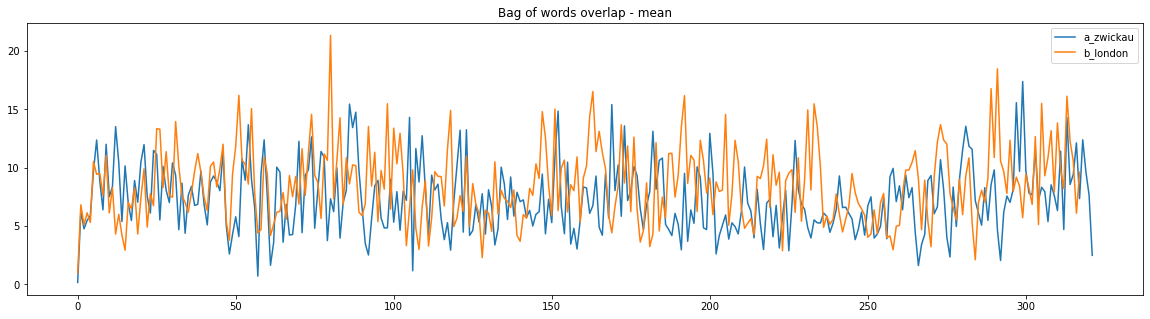

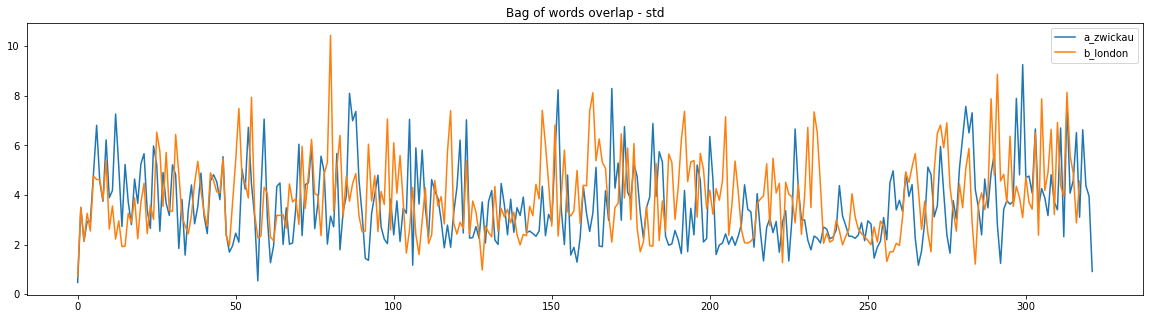

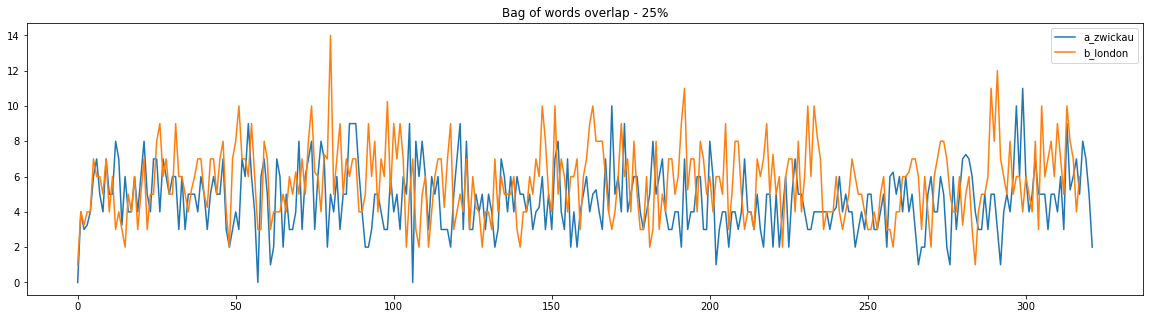

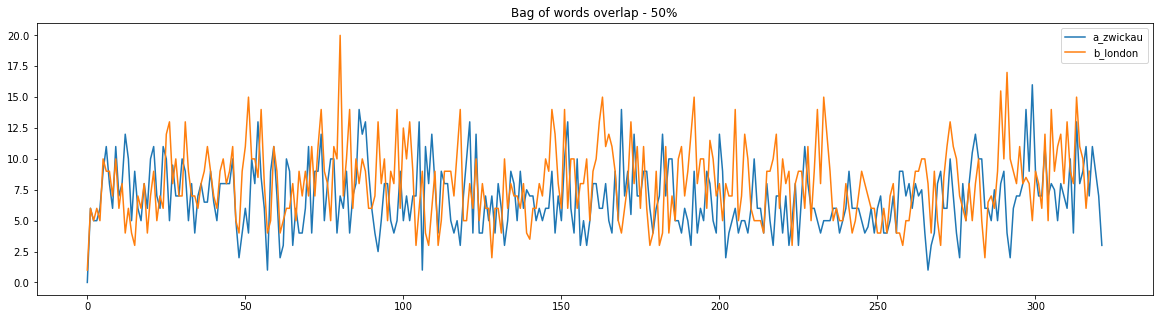

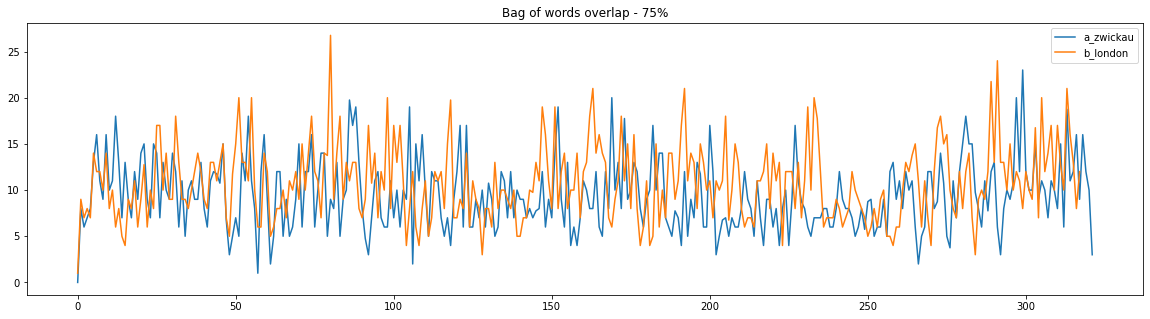

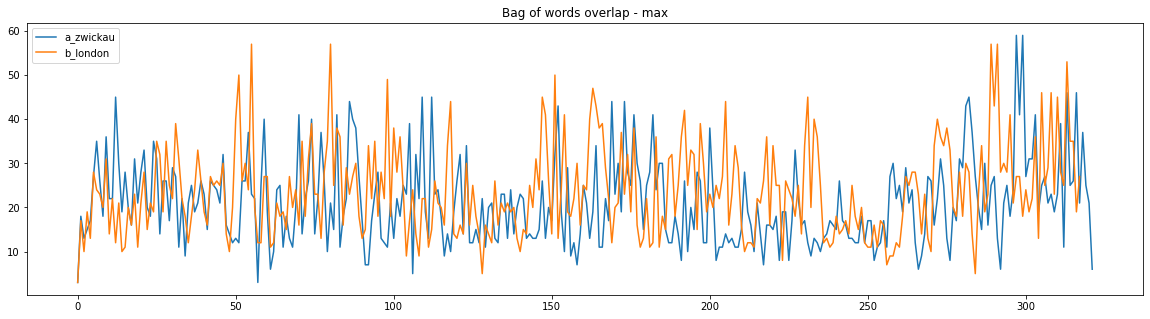

In [286]:
for param in ["mean", "std", "25%", "50%", "75%", "max"]:
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(a_zwickau_bag_of_words_overlap_describe.loc[param, :], label="a_zwickau")
    ax.plot(b_london_bag_of_words_overlap_describe.loc[param, :], label="b_london")
    ax.legend()
    plt.title('Bag of words overlap - {}'.format(param))
    plt.show()

In [39]:
def calculate_n_gram_freq_per_paragraph(corpus, n_gram_val):
    cv = CountVectorizer(ngram_range=(n_gram_val, n_gram_val)).fit(corpus)
    return cv.transform(corpus).toarray()

In [40]:
def inspect_full_array(arr, limit=None):
    if limit is None:
        limit = len(arr)
    with np.printoptions(edgeitems=limit):
        print(arr)

In [45]:
zwickau_2_gram_freq = calculate_n_gram_freq_per_paragraph(zwickau_corpus, 2)
zwickau_3_gram_freq = calculate_n_gram_freq_per_paragraph(zwickau_corpus, 3)
zwickau_4_gram_freq = calculate_n_gram_freq_per_paragraph(zwickau_corpus, 4)

london_2_gram_freq = calculate_n_gram_freq_per_paragraph(london_corpus, 2)
london_3_gram_freq = calculate_n_gram_freq_per_paragraph(london_corpus, 3)
london_4_gram_freq = calculate_n_gram_freq_per_paragraph(london_corpus, 4)

breslau_2_gram_freq = calculate_n_gram_freq_per_paragraph(breslau_corpus, 2)
breslau_3_gram_freq = calculate_n_gram_freq_per_paragraph(breslau_corpus, 3)
breslau_4_gram_freq = calculate_n_gram_freq_per_paragraph(breslau_corpus, 4)

In [43]:
print("a_zwickau_2_gram_freq: " + str(zwickau_2_gram_freq.shape))
print("a_zwickau_3_gram_freq: " + str(zwickau_3_gram_freq.shape))
print("a_zwickau_4_gram_freq: " + str(zwickau_4_gram_freq.shape))

a_zwickau_2_gram_freq: (322, 20422)
a_zwickau_3_gram_freq: (322, 24940)
a_zwickau_4_gram_freq: (322, 25602)


In [44]:
print("b_london_2_gram_freq: " + str(london_2_gram_freq.shape))
print("b_london_2_gram_freq: " + str(london_3_gram_freq.shape))
print("b_london_2_gram_freq: " + str(london_4_gram_freq.shape))

b_london_2_gram_freq: (318, 22542)
b_london_2_gram_freq: (318, 27858)
b_london_2_gram_freq: (318, 28730)


In [46]:
print("breslau_2_gram_freq: " + str(breslau_2_gram_freq.shape))
print("breslau_2_gram_freq: " + str(breslau_3_gram_freq.shape))
print("breslau_2_gram_freq: " + str(breslau_4_gram_freq.shape))

breslau_2_gram_freq: (71, 8009)
breslau_2_gram_freq: (71, 9351)
breslau_2_gram_freq: (71, 9578)


In [292]:
def calculate_cosine_similarities(features):
    paragraphs_amount = len(features) - 1
    cosine_similarities = np.empty([paragraphs_amount + 1, paragraphs_amount + 1])

    for passNo in range(paragraphs_amount, -1, -1):
        cosine_similarities[passNo][passNo] = 1
        for idx in range(passNo):
            cs = cosine_similarity(features[passNo].reshape(1, -1), features[idx].reshape(1, -1))[0][0]
            cosine_similarities[passNo][idx] = cosine_similarities[idx][passNo] = cs
    return cosine_similarities

In [293]:
def calculate_cosine_similarities_average(cosine_similarities):
    average = []
    for i, cs in enumerate(cosine_similarities):
        average.insert(i, np.average(cs))
    return average

In [294]:
a_zwickau_cosine_similarities = calculate_cosine_similarities(a_zwickau_2_gram_freq)
b_london_cosine_similarities = calculate_cosine_similarities(b_london_2_gram_freq)

a_zwickau_cosine_similarities_average = calculate_cosine_similarities_average(a_zwickau_cosine_similarities)
b_london_cosine_similarities_average = calculate_cosine_similarities_average(b_london_cosine_similarities)

In [295]:
print(sum(a_zwickau_2_gram_freq[20]))

cv = CountVectorizer(ngram_range=(2, 2)).fit([a_zwickau_corpus[20]])
sum(cv.transform([a_zwickau_corpus[20]]).toarray()[0])

93


93

In [243]:
# count_vectorizer = CountVectorizer()
# sparse_matrix = count_vectorizer.fit_transform(a_zwickau_corpus)
# doc_term_matrix = sparse_matrix.todense()
# df = pd.DataFrame(doc_term_matrix, 
#                   columns=count_vectorizer.get_feature_names())

In [244]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(pd.DataFrame(similarities))

In [252]:
# def get_n_indexes_of_max_values(arr, n):
#     indices = np.argpartition(-arr, n)[:n]
#     sorted_indices = indices[np.argsort(arr[indices])]
#     return sorted_indices

In [253]:
similarities = cosine_similarity(df, df)
# np.argpartition(similarities[8], -6) HERE is problem that last is not biggest
np.argpartition(-similarities[20], 6)[:6]

array([297,  70,  72, 201,  20, 169])

# Thoughts
we can try to find paragraph that they top 5 similarities more than some threshold (for example 0.6 or 0.7)

then we can take paragraphs that they are similar to and see what are theis most similar paragraphs, and how they compared to previous one, for example

1 similar to 120 with 0.7

120 similart with 18 with 0.6

how similart 1 with 18?

probably creating kind of graph of similarities

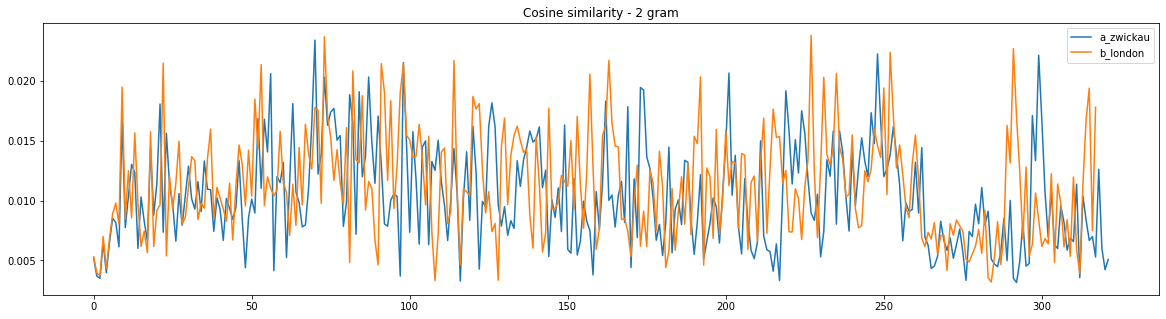

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_cosine_similarities_average, label="a_zwickau")
ax.plot(b_london_cosine_similarities_average, label="b_london")
ax.legend()
plt.title('Cosine similarity - 2 gram'.format(param))
plt.show()

In [28]:
a_zwickau_cosine_similarities = calculate_cosine_similarities(a_zwickau_3_gram_freq)
b_london_cosine_similarities = calculate_cosine_similarities(b_london_3_gram_freq)

a_zwickau_cosine_similarities_average = calculate_cosine_similarities_average(a_zwickau_cosine_similarities)
b_london_cosine_similarities_average = calculate_cosine_similarities_average(b_london_cosine_similarities)

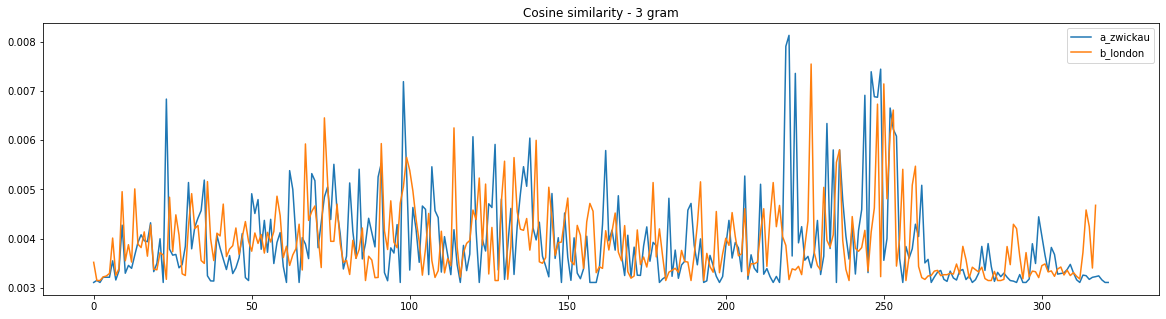

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_cosine_similarities_average, label="a_zwickau")
ax.plot(b_london_cosine_similarities_average, label="b_london")
ax.legend()
plt.title('Cosine similarity - 3 gram'.format(param))
plt.show()

In [30]:
a_zwickau_cosine_similarities = calculate_cosine_similarities(a_zwickau_4_gram_freq)
b_london_cosine_similarities = calculate_cosine_similarities(b_london_4_gram_freq)

a_zwickau_cosine_similarities_average = calculate_cosine_similarities_average(a_zwickau_cosine_similarities)
b_london_cosine_similarities_average = calculate_cosine_similarities_average(b_london_cosine_similarities)

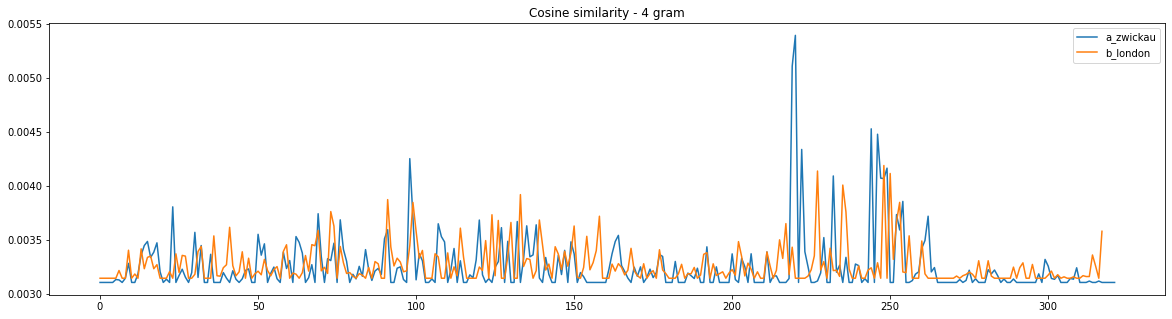

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_cosine_similarities_average, label="a_zwickau")
ax.plot(b_london_cosine_similarities_average, label="b_london")
ax.legend()
plt.title('Cosine similarity - 4 gram'.format(param))
plt.show()

In [50]:
len(a_zwickau_corpus)

322

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(a_zwickau_corpus)

In [52]:
X_arr = X.toarray()
len(X_arr)

322

In [30]:
vectorizer

TfidfVectorizer()

In [37]:
cosine_similarity(X.toarray()[1].reshape(1, -1), X.toarray()[1].reshape(1, -1))

array([[1.]])

In [51]:
print(X.toarray()[4].reshape(1, -1))

[[0. 0. 0. ... 0. 0. 0.]]


In [50]:
print(X.toarray()[4])

[0. 0. 0. ... 0. 0. 0.]


In [53]:
num_of_paragraphs = len(X_arr)
cosine_similarities = pd.DataFrame(dtype=np.float64)
for passNo in range(0, num_of_paragraphs, 1):
    cosine_similarities.at[passNo, passNo] = 1

In [54]:
cosine_similarities

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


TypeError: reindex() got an unexpected keyword argument "rows"

In [57]:
print(type(a_zwickau_cosine_similarities[0][321]))
print(a_zwickau_cosine_similarities[0][321])

<class 'numpy.float64'>
0.17677669529663687


In [32]:
with pd.option_context('display.float_format', '${:,.17f}'.format):
    df_test = pd.DataFrame.from_records(data=a_zwickau_cosine_similarities).loc[0:0, 321:321].values[0]
df_test

array([0.1767767])

array([0.1767767])

In [83]:
df_test = pd.DataFrame(data=a_zwickau_cosine_similarities, dtype=np.float64, copy=True)

In [84]:
df_test.loc[0:0, 321:321].values[0]

array([0.1767767])

In [85]:
df_test.at[0, 321] = 0.17677669529663687

In [86]:
df_test.loc[0:0, 321:321].values[0]

array([0.1767767])

In [14]:
zwickau_p_lenghts = list(map(lambda t: len(t), zwickau_corpus))
london_p_lenghts = list(map(lambda t: len(t), london_corpus))

In [24]:
diff = []
for i in range(0, len(london_p_lenghts)):
    diff.append(zwickau_p_lenghts[i] - london_p_lenghts[i])

In [75]:
min(diff)

-3392

In [78]:
diff[80]

-3392

In [79]:
diff[86]

1535

In [77]:
np.argmin(diff)

80

In [80]:
sum(list(filter(lambda i: i < 0, diff)))

-77452

In [81]:
sum(list(filter(lambda i: i > 0, diff)))

54114

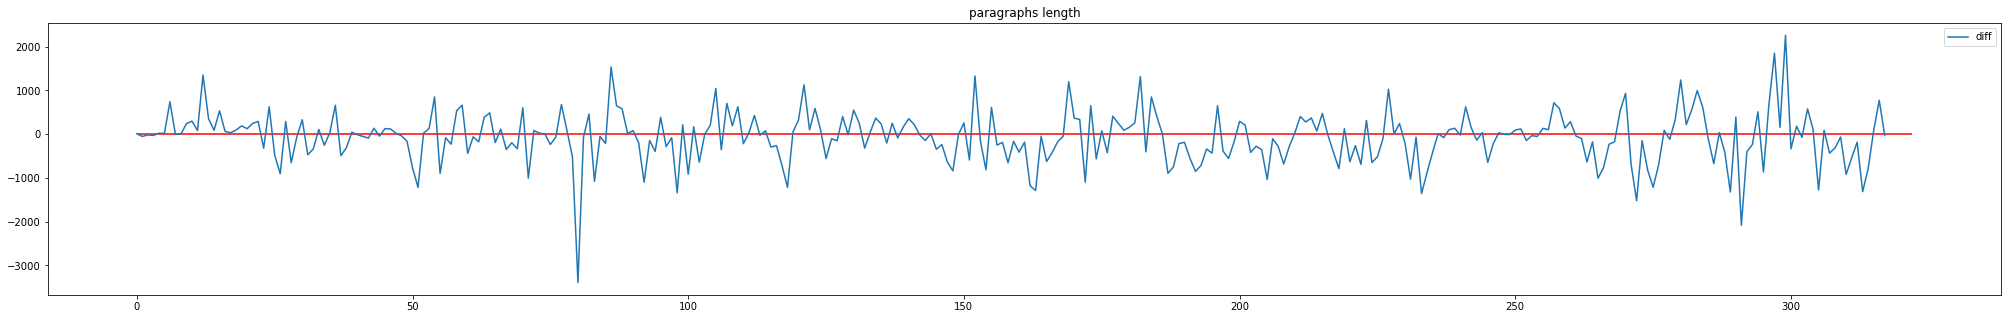

In [74]:
fig, ax = plt.subplots(figsize=(35, 5))
# ax.plot(zwickau_p_lenghts, label="zwickau")
# ax.plot(london_p_lenghts, label="london")
ax.plot(diff, label="diff")
ax.legend()
plt.title('paragraphs length')
ax.hlines(y=0, xmin=0, xmax=322, colors='r')
plt.show()

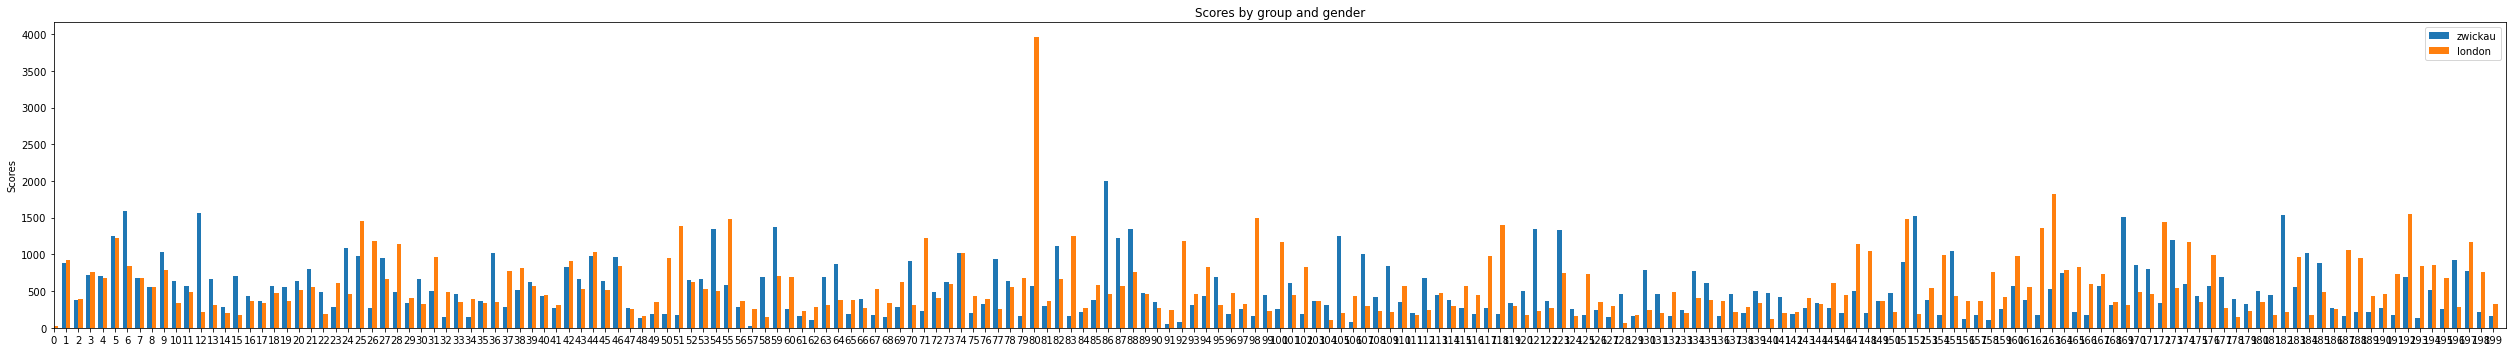

In [70]:
range_select = range(0, 200) 
labels = list(range_select)
men_means = zwickau_p_lenghts[0:200]
women_means = london_p_lenghts[0:200]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(35, 5))
rects1 = ax.bar(x - width/2, men_means, width, label='zwickau')
rects2 = ax.bar(x + width/2, women_means, width, label='london')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xlim(0,200)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()